In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [54]:
from sklearn.datasets import make_classification, make_blobs

# Разделяющая граница

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
from mlxtend.plotting import plot_decision_regions

In [57]:
def generated_entangled_clouds():
    X1, Y1 = make_blobs(n_features=2, centers=1)
    X2, Y2 = make_blobs(n_features=2, centers=1)
    Y2 = np.ones_like(Y2)
    X1 -= np.mean(X1, axis=0)
    X2 -= np.mean(X2, axis=0)
    X2 += 1
    X = np.vstack((X1, X2)); Y = np.hstack((Y1, Y2))
    return X, Y

In [58]:
X, Y = generated_entangled_clouds()

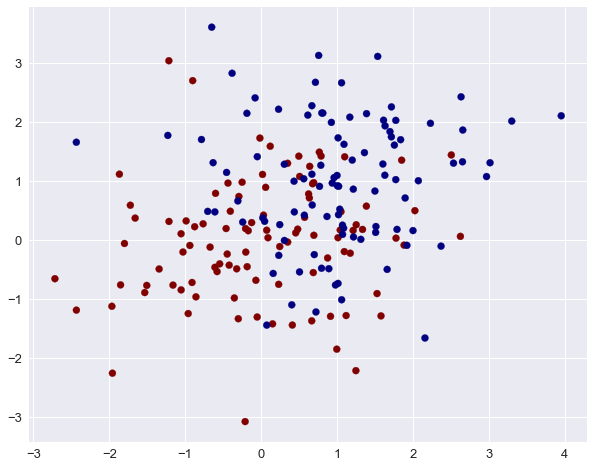

In [59]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, cmap=plt.cm.jet_r);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1</h3> 
    </div>
</div>

Постройте __DecisionTree__ из пакета __sklearn.tree__ на выборке _X, Y_, нарисуйте разделяющую границу с помощью __mlxtend.plotting.plot_decision_regions__.

Сравните с разделяющей границей других известных вам классификаторов.

Убедитесь, что вы переобучили дерево, и достигается нулевая ошибка на обучающей выборке.

#### DecisionTree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=1234)
clf = clf.fit(X, Y)
scores = cross_val_score(clf, X, Y)
print('Mean score:', scores.mean())

Mean score: 0.650029708853


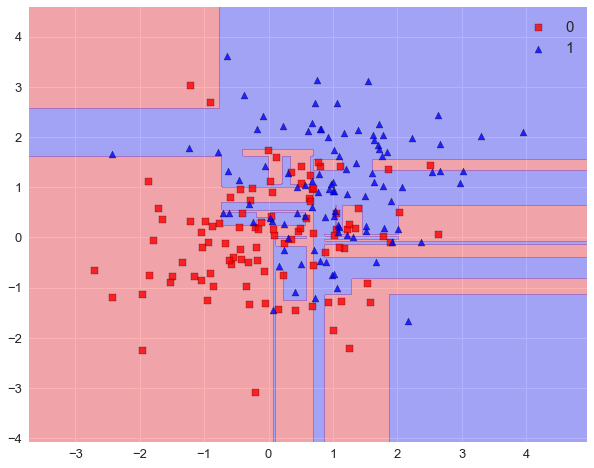

In [61]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf)

#### Lasso

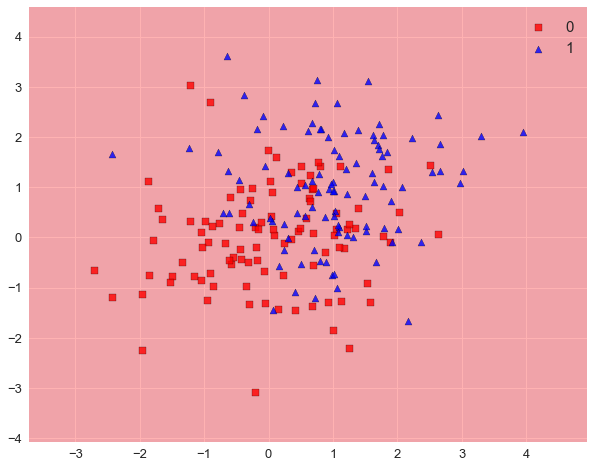

In [62]:
from sklearn.linear_model import Lasso
clf2 = Lasso()
clf2.fit(X, Y);
plot_decision_regions(X,Y,clf2)

#### KNeighborsClassifier

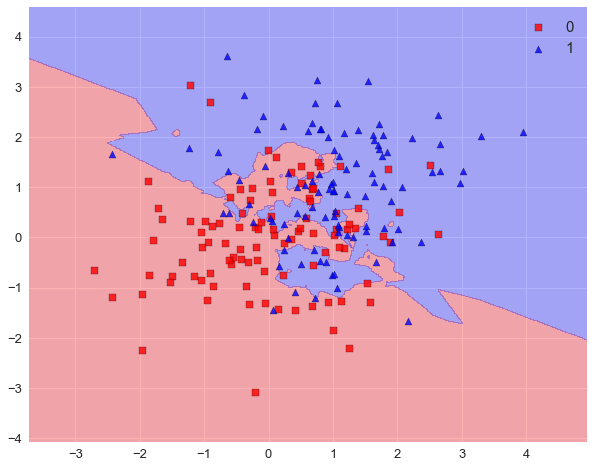

In [63]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier()
clf3.fit(X, Y);
plot_decision_regions(X,Y,clf3)

#### RandomForestClassifier

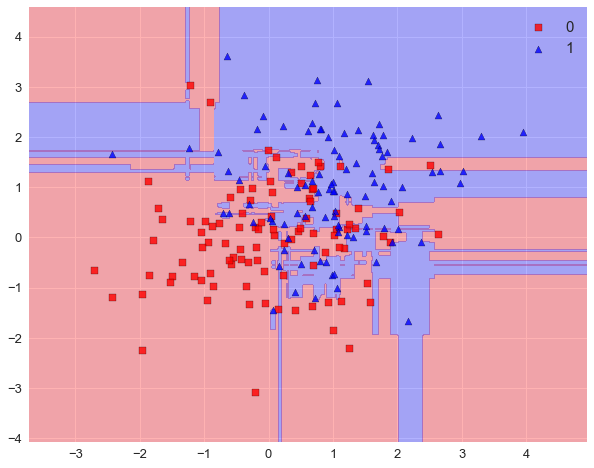

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(random_state=1234)
clf4.fit(X, Y);
plot_decision_regions(X,Y,clf4)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2</h3> 
    </div>
</div>

Создайте еще пару деревьев, повторите процедуру, нарисуйте разделяющую границу. Объясните, почему она выходит различной от раза к разу.

#### DecisionTree

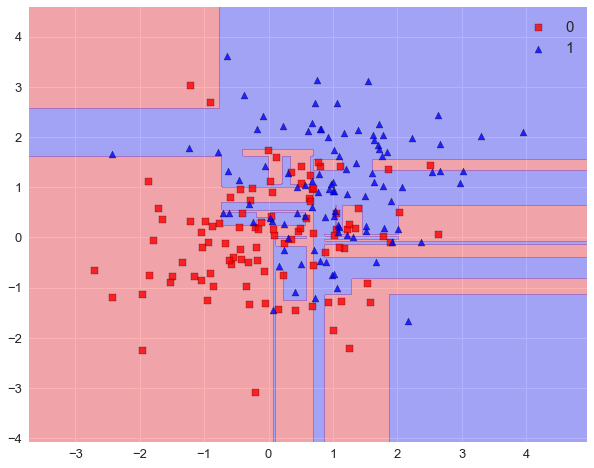

In [65]:
clf5 = DecisionTreeClassifier(random_state=1234)
clf5 = clf5.fit(X, Y)
scores = cross_val_score(clf5, X, Y)
plot_decision_regions(X,Y,clf5)

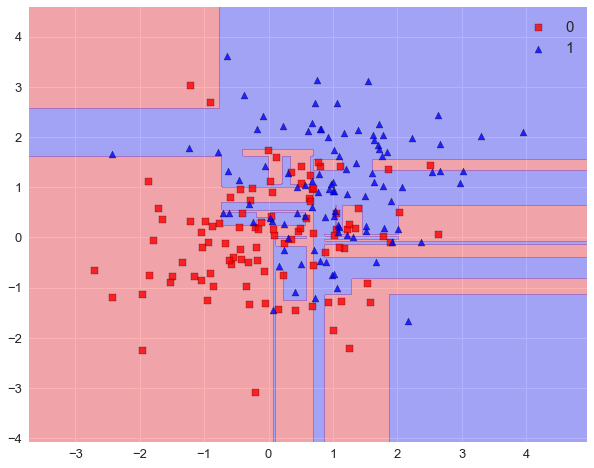

In [66]:
plot_decision_regions(X,Y,clf5)

#### ExtraTreesClassifier

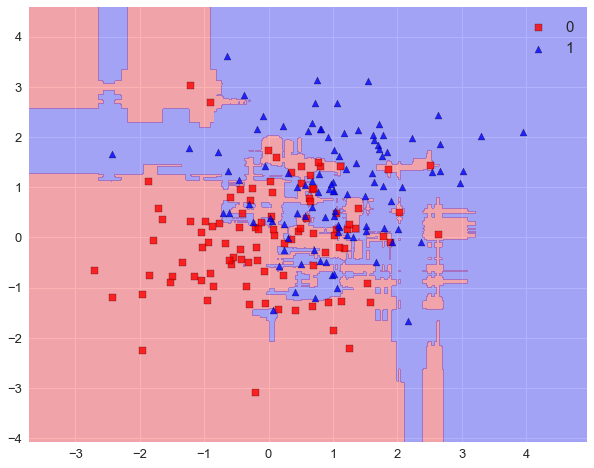

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
clf6 = ExtraTreesClassifier(random_state=1234)
clf6 = clf6.fit(X, Y)
scores = cross_val_score(clf6, X, Y)
plot_decision_regions(X,Y,clf6)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3</h3> 
    </div>
</div>

Вооружитесь готовым кодом ниже. Это - данные о пассажирах Титаника: где они сидели, сколько им было лет, плыли ли они в одиночку или с родней и так далее. Требуется предсказать, выжил ли пассажир. Такую задачу вы решать уже, безусловно, умеете.

Возьмите __validation_curve__ из __sklearn.model_selection__. С помощью этой функции постройте графики ошибок при различных значениях гиперпараметров:

* __n_estimators__ - один из самых важных параметров!
* __max_features__ - один из самых важных параметров!
* __min_samples_split__ 
* __min_samples_leaf__
* __max_depth__ 

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [208]:
def get_preprocessed_titanic():
    df = sns.load_dataset('titanic')

    X, y = df.drop(['survived'], axis=1), df.survived

    X["embarked"] = X["embarked"].fillna("S")
    X["fare"].fillna(X["fare"].median(), inplace=True)
    X["embark_town"] = X["embark_town"].fillna(X.embark_town.value_counts().index[0]) 
    
    average_age_titanic   = X["age"].mean()
    std_age_titanic       = X["age"].std()
    count_nan_age_titanic = X["age"].isnull().sum()
    rand_1 = np.random.randint(average_age_titanic - std_age_titanic, 
                               average_age_titanic + std_age_titanic, 
                               size=count_nan_age_titanic)
    
    X.loc[X.age.isnull(), 'age'] = rand_1
    X.drop(['deck', 'alive'], axis=1, inplace=True)
    return X, y

In [209]:
df = sns.load_dataset('titanic')

In [210]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [211]:
X, y = get_preprocessed_titanic()

In [212]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True


In [213]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

_Лайфхак_: преврати все подряд в one-hot-закодированное все подряд с помощью __pd.get_dummies__!

In [214]:
X = pd.get_dummies(X)

In [215]:
X.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,3,26.0,0,0,7.9250,False,True,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,False,False,1,0,0,...,1,1,0,0,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,True,True,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [216]:
X.shape

(891, 21)

In [217]:
from sklearn.ensemble import ExtraTreesClassifier
clf7 = ExtraTreesClassifier(random_state=1234)
clf7 = clf7.fit(X, y)

In [218]:
from sklearn.model_selection import validation_curve

In [221]:
def plot_validation_curve(clf, X, y, param_name, param_range, cv):
    from sklearn.model_selection import validation_curve

    train_scores, valid_scores = validation_curve(clf, X, y, param_name, param_range, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.plot(param_range, train_scores_mean, c='orange');
    plt.plot(param_range, valid_scores_mean, color='red');
    plt.fill_between(param_range, 
                     valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, 
                     alpha=0.2, color='red');
    plt.title(param_name);

#### n_estimators

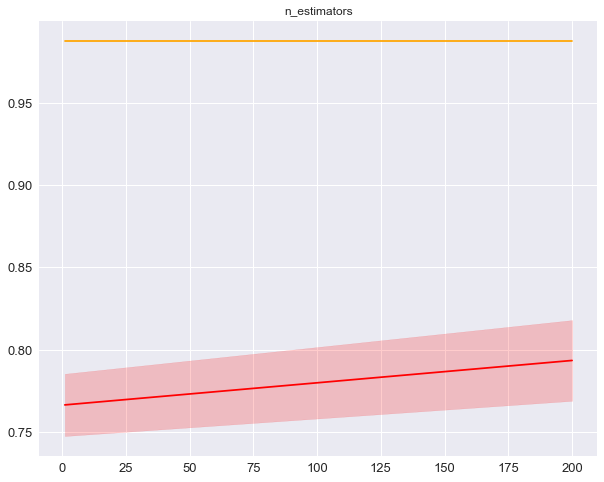

In [222]:
plot_validation_curve(clf7,X,y,'n_estimators',[1,200],5)

#### max_features

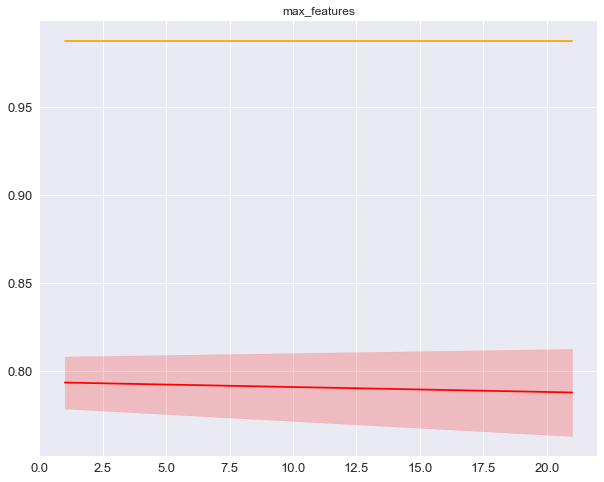

In [223]:
plot_validation_curve(clf7,X,y,'max_features',[1,X.shape[1]],5)

#### min_samples_split

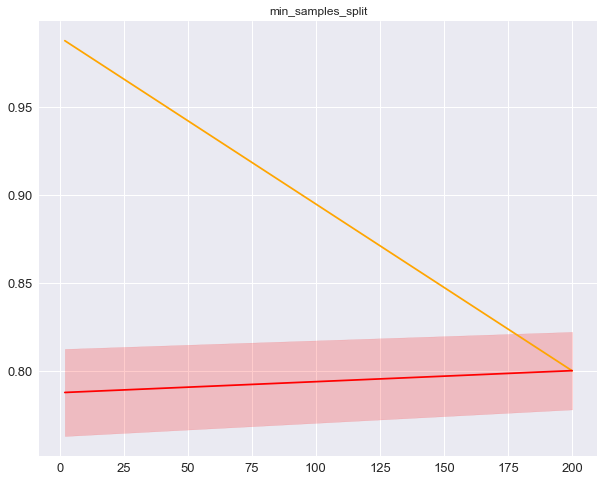

In [224]:
plot_validation_curve(clf7,X,y,'min_samples_split',[2,200],5)

#### min_samples_leaf

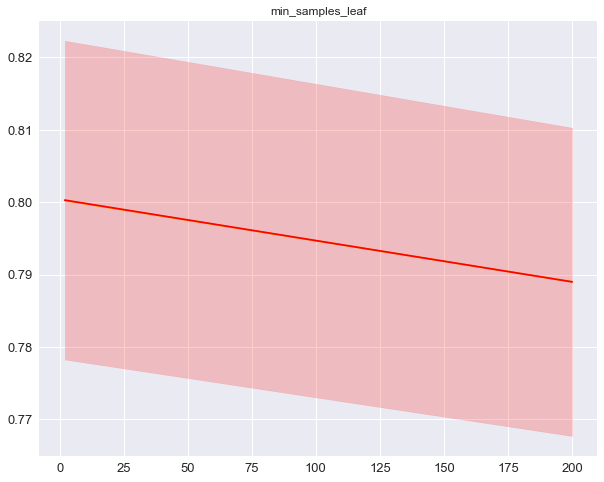

In [225]:
plot_validation_curve(clf7,X,y,'min_samples_leaf',[2,200],5)

#### max_depth

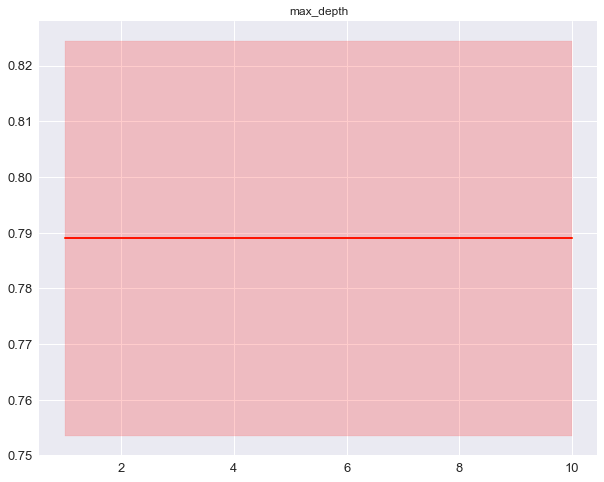

In [226]:
plot_validation_curve(clf7,X,y,'max_depth',[1,10],10)